<a href="https://colab.research.google.com/github/Jessica0100/data/blob/main/21_209_jaisyatul_mar'ah_tugas_Pra_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS PRA UAS JAISYATUL MAR'AH 210411100209

1. Setup & Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data dari file lokal (upload manual jika di Colab)
from google.colab import files
uploaded = files.upload()

# Membaca dataset
df = pd.read_csv('breast-cancer.data', header=None)

# Menetapkan nama kolom
df.columns = [
    'Class', 'age', 'menopause', 'tumor-size', 'inv-nodes',
    'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'
]


Saving breast-cancer.data to breast-cancer.data


2. Data Understanding  
a. Melihat Struktur Data

In [2]:
print(df.info())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
None
                       Class    age menopause tumor-size inv-nodes node-caps  \
count                    286    286       286        286       286       286   
unique                     2      6         3         11         7         3   
top     no-recurrence-events  50-59   premeno      30-34       0-2        no   
freq                     20

a. Penjelasan Fitur
Dataset breast-cancer.data berisi informasi klinis dari pasien kanker payudara, terdiri dari 286 entri dan 10 atribut. Atribut-atributnya sebagian besar berupa data kategorikal.

Atribut	Tipe Data	Penjelasan
Class	Kategorikal (Label)	Kelas target: no-recurrence-events atau recurrence-events
age	Kategorikal Ordinal	Rentang usia pasien
menopause	Kategorikal Nominal	Status menopause: premeno, lt40, ge40
tumor-size	Kategorikal Ordinal	Ukuran tumor (misalnya 30-34, 20-24)
inv-nodes	Kategorikal Ordinal	Banyaknya kelenjar limfa yang terkena
node-caps	Kategorikal Nominal	Apakah kapsul kelenjar limfa terkena (yes, no, ?)
deg-malig	Numerik Ordinal	Derajat keganasan tumor: 1 (ringan) sampai 3 (berat)
breast	Kategorikal Nominal	Lokasi kanker: left atau right
breast-quad	Kategorikal Nominal	Kuadran payudara tempat kanker ditemukan
irradiat	Kategorikal Nominal	Apakah pasien menerima terapi radiasi (yes atau no)


Kenapa ini penting?
Memahami jenis data menentukan metode pra-pemrosesan dan pemilihan algoritma klasifikasi.

b. Cek Nilai Unik & Missing Value (?)

In [3]:
print("Nilai unik per kolom:\n", df.nunique())
print("\nJumlah nilai `?`:\n", (df == '?').sum())


Nilai unik per kolom:
 Class           2
age             6
menopause       3
tumor-size     11
inv-nodes       7
node-caps       3
deg-malig       3
breast          2
breast-quad     6
irradiat        2
dtype: int64

Jumlah nilai `?`:
 Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64


In [4]:
print("\nApakah ada missing value sama sekali?", df.isna().values.any())



Apakah ada missing value sama sekali? False


In [5]:
# Tabel ringkasan missing
pd.DataFrame({
    'Missing (?)': (df == '?').sum(),
    'Missing (NaN)': df.isna().sum()
})


,Missing (?),Missing (NaN)
Class,0,0
age,0,0
menopause,0,0
tumor-size,0,0
inv-nodes,0,0
node-caps,8,0
deg-malig,0,0
breast,0,0
breast-quad,1,0
irradiat,0,0


Dataset terdiri dari 286 baris, 10 kolom, tanpa header.

Ditemukan missing value yang ditulis sebagai “?”, bukan NaN.

node-caps memiliki 8 nilai hilang

breast-quad memiliki 1 nilai hilang

Hampir semua kolom bersifat kategorikal, hanya deg-malig yang bersifat numerik ordinal.

c. Visualisasi Data

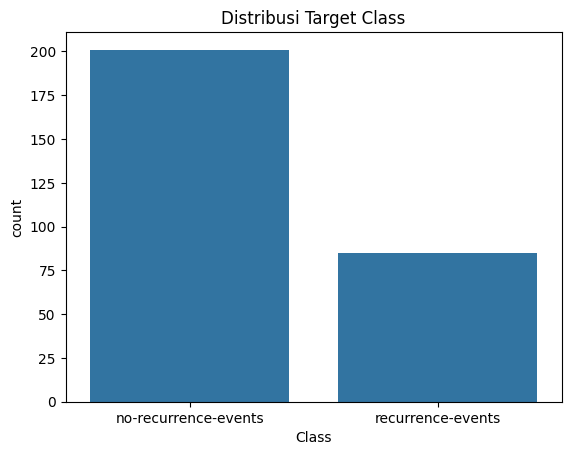

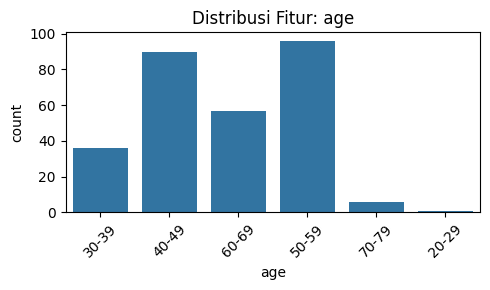

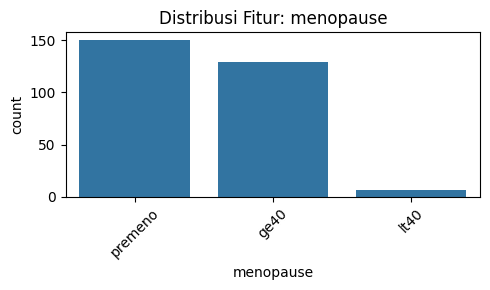

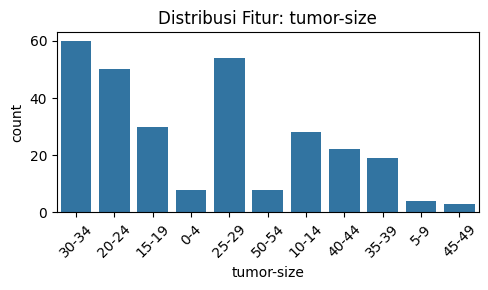

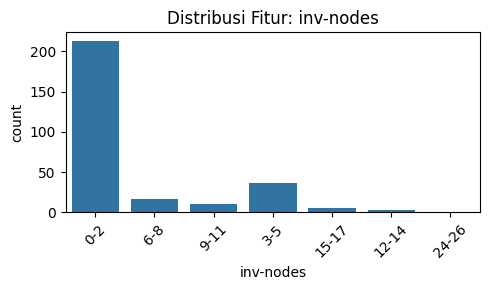

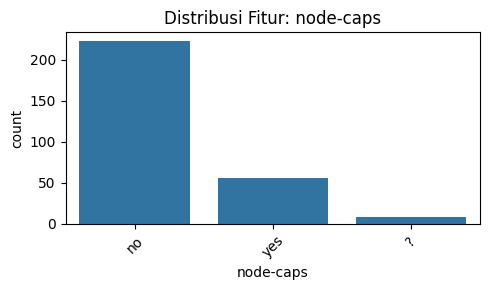

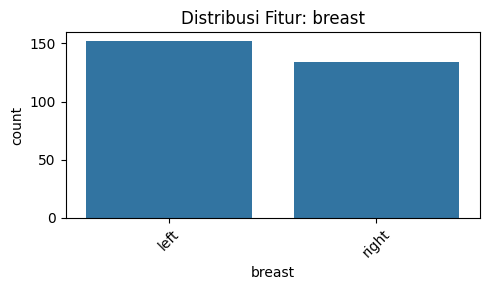

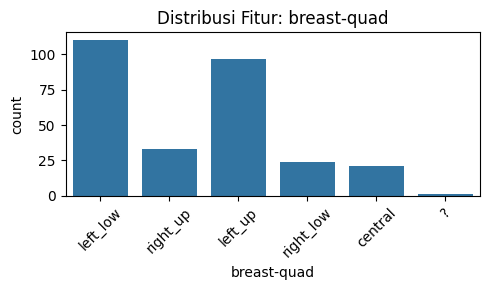

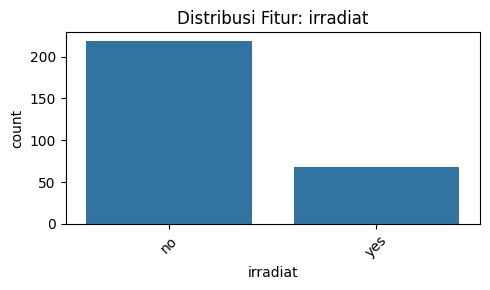

In [6]:
# Distribusi kelas target
sns.countplot(data=df, x='Class')
plt.title('Distribusi Target Class')
plt.show()

# Visualisasi fitur kategorikal
categorical_columns = ['age', 'menopause', 'tumor-size', 'inv-nodes',
                       'node-caps', 'breast', 'breast-quad', 'irradiat']
for col in categorical_columns:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi Fitur: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Dilakukan visualisasi distribusi target class dan fitur-fitur kategorikal

Gunanya untuk memahami sebaran data, mendeteksi dominasi kelas, serta potensi data imbalance.

ini penting karena Visualisasi membantu mengenali struktur dan potensi masalah sebelum pemodelan.

3. Preposesing

a. Ganti tanda ? jadi NaN

In [7]:
df.replace('?', np.nan, inplace=True)
print(df.isna().sum())


Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64


Tanda ? diubah menjadi np.nan agar bisa dikenali sebagai missing oleh Python.

Missing value diisi menggunakan modus (nilai yang paling sering muncul di kolom tersebut).

Kenapa pakai modus?
Karena semua fitur bersifat kategorikal, modus adalah strategi pengisian yang paling masuk akal tanpa mengubah distribusi data.

b. Menangani Missing Value

In [8]:
# Isi missing value dengan modus (nilai terbanyak)
for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-8-1795166546.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


c. Encode Data Kategorikal (One-Hot & Label Encoding)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Label encode kolom target
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])  # 0 = no-recurrence, 1 = recurrence

# Label encode semua fitur kategorikal
categorical_cols = df.drop(columns=['Class', 'deg-malig']).columns
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded.head()


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,0,3,0,1,0
1,0,2,2,3,0,0,2,1,4,0
2,0,2,2,3,0,0,2,0,1,0
3,0,4,0,2,0,0,2,1,2,0
4,0,2,2,0,0,0,2,1,3,0


Digunakan Label Encoding untuk fitur-fitur kategorikal.

Class (target) diubah menjadi 0 dan 1 (no-recurrence-events dan recurrence-events).

d. Normalisasi

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Pisahkan fitur dan target
X = df_encoded.drop(columns='Class')
y = df_encoded['Class']

# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Ubah ke DataFrame agar tetap bisa dilihat kolomnya
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [11]:
from sklearn.model_selection import train_test_split

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)


Dilakukan Min-Max Scaling pada semua fitur setelah encoding.

Tujuannya agar semua nilai fitur berada di rentang 0–1.

-Kenapa perlu normalisasi?

KNN berbasis jarak → butuh fitur dengan skala yang sebanding.

Naive Bayes bisa digunakan tanpa scaling, tapi normalisasi tetap membantu menghindari dominasi fitur berskala besar.

Klasifikasi Model

1.  Klasifikasi dengan K-Nearest Neighbors (KNN)

KNN mencari k tetangga terdekat (dalam hal jarak) untuk menentukan kelas sebuah data.

Model dilatih dengan k=5 (nilai default yang umum).

Kenapa saya memilih KNN?
Karena KNN sangat intuitif, mudah dipahami, dan cocok untuk dataset kecil seperti ini.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn.predict(X_test)

# Evaluasi
print("🔹 KNN - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\n🔹 KNN - Classification Report:\n", classification_report(y_test, y_pred_knn))
print("🔹 KNN - Accuracy:", accuracy_score(y_test, y_pred_knn))


🔹 KNN - Confusion Matrix:
 [[36  1]
 [16  5]]

🔹 KNN - Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.97      0.81        37
           1       0.83      0.24      0.37        21

    accuracy                           0.71        58
   macro avg       0.76      0.61      0.59        58
weighted avg       0.74      0.71      0.65        58

🔹 KNN - Accuracy: 0.7068965517241379


2. Klasifikasi dengan Naive Bayes (GaussianNB)

Digunakan GaussianNB dari sklearn, yang mengasumsikan fitur mengikuti distribusi normal.

Meskipun datanya tidak sepenuhnya numerik, hasil encoding + normalisasi memungkinkan model tetap bekerja.

Kenapa saya menggunakan Naive Bayes?
Naive Bayes cepat, efisien, dan seringkali menghasilkan hasil cukup baik bahkan pada data kecil dengan banyak fitur.

In [13]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prediksi
y_pred_nb = nb.predict(X_test)

# Evaluasi
print("🔹 Naive Bayes - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\n🔹 Naive Bayes - Classification Report:\n", classification_report(y_test, y_pred_nb))
print("🔹 Naive Bayes - Accuracy:", accuracy_score(y_test, y_pred_nb))


🔹 Naive Bayes - Confusion Matrix:
 [[32  5]
 [13  8]]

🔹 Naive Bayes - Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78        37
           1       0.62      0.38      0.47        21

    accuracy                           0.69        58
   macro avg       0.66      0.62      0.63        58
weighted avg       0.68      0.69      0.67        58

🔹 Naive Bayes - Accuracy: 0.6896551724137931


5. Evaluasi Model :
membandingkan kedua model (KNN, Naive Bayes) dalam satu tabel evaluasi, mencakup:

Accuracy: seberapa banyak prediksi benar secara keseluruhan.

Precision: seberapa banyak prediksi positif yang benar.

Recall: seberapa banyak kasus positif yang berhasil dikenali.

F1-Score: rata-rata harmonik precision dan recall.

Confusion Matrix: distribusi prediksi benar/salah dalam bentuk tabel.

Kenapa semua metrik ini digunakan?
Karena hanya menggunakan akurasi saja bisa menyesatkan, terutama jika data tidak seimbang.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Definisikan dua model
models = {
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Inisialisasi list hasil evaluasi
results = []

# Latih dan evaluasi
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung metrik
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': round(acc, 3),
        'Precision': round(prec, 3),
        'Recall': round(rec, 3),
        'F1-Score': round(f1, 3)
    })

# Buat DataFrame hasil
comparison_df = pd.DataFrame(results)
comparison_df


,Model,Accuracy,Precision,Recall,F1-Score
0,KNN (k=5),0.707,0.833,0.238,0.370
1,Naive Bayes,0.690,0.615,0.381,0.471


Menampiklkan Model Terbaik Berdasarkan AKurasi

In [15]:
# Ambil model dengan nilai Accuracy tertinggi
best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]

# Tampilkan model terbaik
print("Model Terbaik Berdasarkan Akurasi:\n")
print(best_model)


Model Terbaik Berdasarkan Akurasi:

Model        KNN (k=5)
Accuracy         0.707
Precision        0.833
Recall           0.238
F1-Score          0.37
Name: 0, dtype: object


KNN lebih baik secara keseluruhan, terutama pada akurasi dan F1-score.

Naive Bayes tetap kompetitif, meskipun kalah dalam recall.

visualisasi hasil evaluasi:

1. Visualisasi Metrik Evaluasi (Bar Chart)

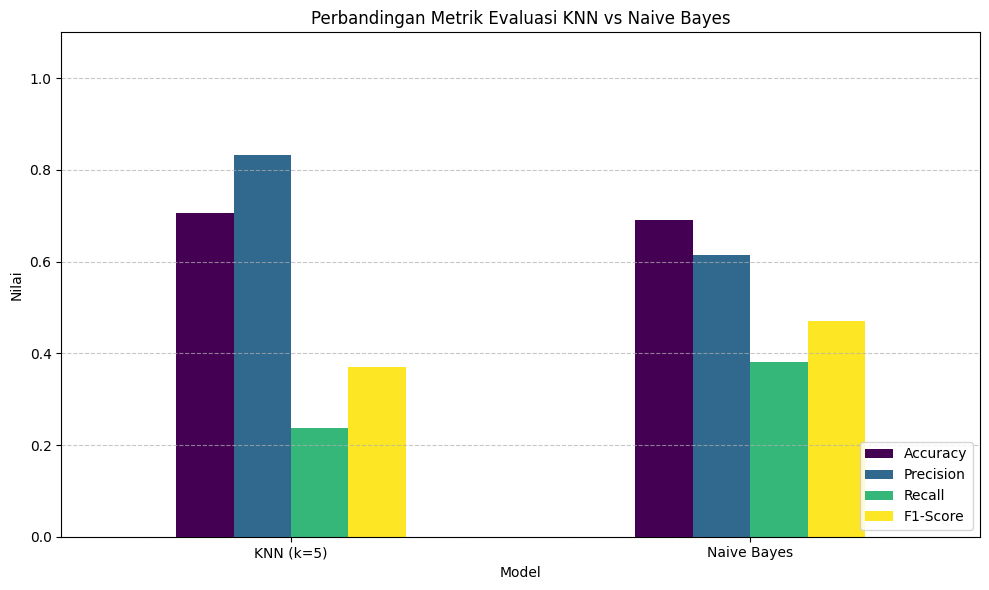

In [16]:
import matplotlib.pyplot as plt

# Set index model agar lebih mudah untuk plot
# Ubah 'eval_df' menjadi 'comparison_df'
comparison_df.set_index('Model', inplace=True)

# Plot semua metrik evaluasi
comparison_df.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Perbandingan Metrik Evaluasi KNN vs Naive Bayes')
plt.ylabel('Nilai')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

 2. Visualisasi Confusion Matrix

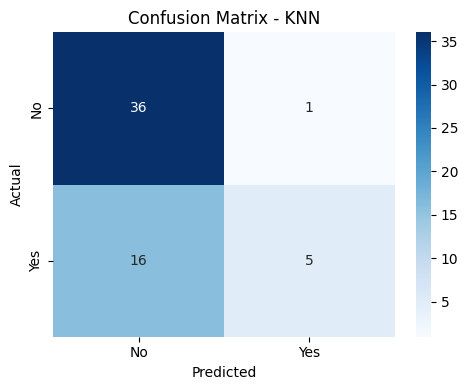

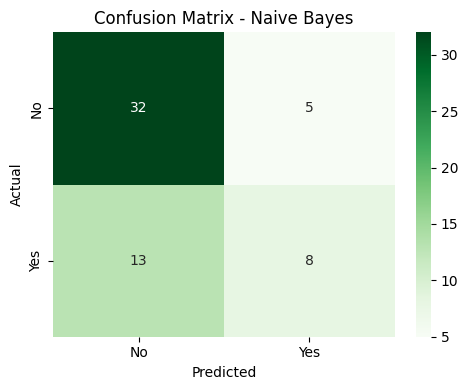

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Confusion matrix Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Bar Chart digunakan untuk membandingkan akurasi, precision, recall, dan F1 dari kedua model.

Heatmap confusion matrix digunakan untuk menampilkan klasifikasi benar dan salah dari kedua model.

Kenapa visualisasi dibutuhkan?
Membantu menjelaskan performa model ke non-teknis dan mempermudah analisis hasil model.